In [178]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# ENCODER

In [179]:
class Encoder(nn.Module):
     
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()
        
        self.linear = nn.Linear(input_dim, hidden_dim)
        self.linear_mu = nn.Linear(hidden_dim, latent_dim)
        self.linear_logvar = nn.Linear(hidden_dim, latent_dim)

    def forward(self, x):
        h = self.linear(x)
        h = nn.ReLU()(h) 
        mu = self.linear_mu(h)
        logvar = self.linear_logvar(h)

        return mu, logvar

# DECODER

In [180]:
class Decoder(nn.Module):
    
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        
        self.linear1 = nn.Linear(latent_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        h = self.linear1(x)
        h = nn.ReLU()(h)  
        x_hat = nn.Sigmoid()(self.linear2(h))
        return x_hat

# VAE

In [181]:
class VAE(nn.Module):

    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)
    
    def forward(self, x):
        mu, logvar = self.encoder(x)
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        x_hat = self.decoder(z)

        return x_hat, mu, logvar

# LOSS FUNCTION

In [182]:
def loss_function(x, x_hat, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD

# HYPERPARAMETERS

In [183]:
input_dim = 784 # (28, 28) pixel
hidden_dim = 400
latent_dim = 20

In [184]:
learning_rate = 1e-3

In [185]:
batch_size = 128
number_of_epoch = 10

# DATA LOADER

In [186]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))
])

In [187]:
train_dataset = datasets.MNIST(root='./data', train = True, transform=transform, download = True)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle = True)

# MODEL

In [188]:
model = VAE(input_dim, hidden_dim, latent_dim)

# OPTIMIZER

In [189]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [190]:
model.train()

VAE(
  (encoder): Encoder(
    (linear): Linear(in_features=784, out_features=400, bias=True)
    (linear_mu): Linear(in_features=400, out_features=20, bias=True)
    (linear_logvar): Linear(in_features=400, out_features=20, bias=True)
  )
  (decoder): Decoder(
    (linear1): Linear(in_features=20, out_features=400, bias=True)
    (linear2): Linear(in_features=400, out_features=784, bias=True)
  )
)

In [191]:
for epoch in range(number_of_epoch):
    train_loss = 0
    for x, _ in train_loader:
        x = x.view(-1, input_dim)

        optimizer.zero_grad()
        x_hat, mu, logvar = model(x)
        loss = loss_function(x, x_hat, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        print(f"Epoch {epoch + 1}, Loss: {train_loss / len(train_loader.dataset)}")

Epoch 1, Loss: 1.1697533854166666
Epoch 1, Loss: 2.2824321614583334
Epoch 1, Loss: 3.3396150390625
Epoch 1, Loss: 4.340325455729166
Epoch 1, Loss: 5.281444856770833
Epoch 1, Loss: 6.150096614583333
Epoch 1, Loss: 6.9501216796875
Epoch 1, Loss: 7.686638997395833
Epoch 1, Loss: 8.366744856770833
Epoch 1, Loss: 9.011258658854167
Epoch 1, Loss: 9.646029231770834
Epoch 1, Loss: 10.2519728515625
Epoch 1, Loss: 10.8646412109375
Epoch 1, Loss: 11.4222369140625
Epoch 1, Loss: 11.980877864583332
Epoch 1, Loss: 12.520798046875
Epoch 1, Loss: 13.040606119791667
Epoch 1, Loss: 13.549358170572917
Epoch 1, Loss: 14.068738997395833
Epoch 1, Loss: 14.586020182291668
Epoch 1, Loss: 15.097295572916666
Epoch 1, Loss: 15.581417317708333
Epoch 1, Loss: 16.073555859375
Epoch 1, Loss: 16.56148515625
Epoch 1, Loss: 17.056168326822917
Epoch 1, Loss: 17.534193391927083
Epoch 1, Loss: 18.02157490234375
Epoch 1, Loss: 18.493435774739584
Epoch 1, Loss: 18.975814485677084
Epoch 1, Loss: 19.44303935546875
Epoch 1, Lo

In [192]:
model.eval()

VAE(
  (encoder): Encoder(
    (linear): Linear(in_features=784, out_features=400, bias=True)
    (linear_mu): Linear(in_features=400, out_features=20, bias=True)
    (linear_logvar): Linear(in_features=400, out_features=20, bias=True)
  )
  (decoder): Decoder(
    (linear1): Linear(in_features=20, out_features=400, bias=True)
    (linear2): Linear(in_features=400, out_features=784, bias=True)
  )
)

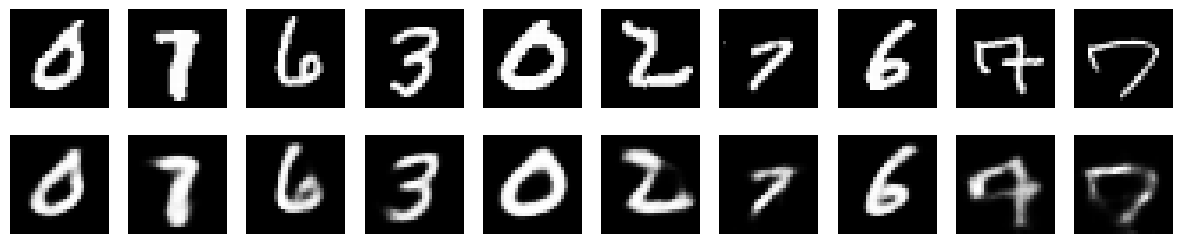

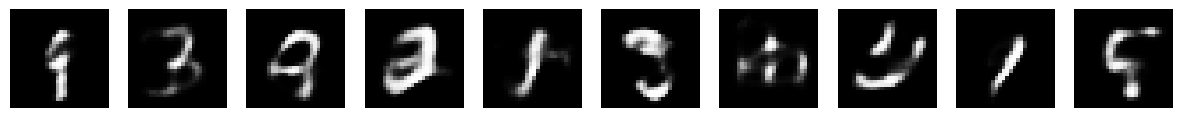

In [177]:
with torch.no_grad():
    x, _ = next(iter(train_loader))
    x = x.view(-1, input_dim)  # Bu doğru, ancak yeniden şekillendirme yapmanız gerekebilir
    x_hat, mu, logvar = model(x)
    
    # x ve x_hat'ı yeniden şekillendirin
    x = x.view(-1, 28, 28)  # 28x28 görüntü şekline getir
    x_hat = x_hat.view(-1, 28, 28)  # 28x28 görüntü şekline getir
    
    fig, axs = plt.subplots(2, 10, figsize=(15, 3))
    for i in range(10):
        axs[0, i].imshow(x[i].cpu().numpy(), cmap='gray')
        axs[1, i].imshow(x_hat[i].cpu().numpy(), cmap='gray')
        axs[0, i].axis('off')
        axs[1, i].axis('off')
    plt.show()

with torch.no_grad():
    z = torch.randn(10, latent_dim)
    sample = model.decoder(z)
    sample = sample.view(-1, 28, 28)
    
    fig, axs = plt.subplots(1, 10, figsize=(15, 3))
    for i in range(10):
        axs[i].imshow(sample[i].cpu().numpy(), cmap='gray')
        axs[i].axis('off')
    plt.show()